In [41]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Linear regression

In [2]:
# data from chapter 32
insulin_sensitiv = np.array([250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375])
C2022_fatacids = np.array([17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4])

## Graph

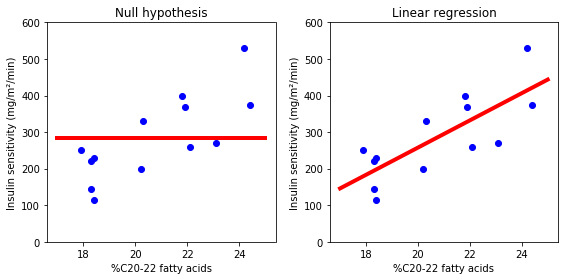

In [9]:
res = stats.linregress(x=C2022_fatacids, y=insulin_sensitiv)

plt.figure(figsize=(8,4))
plt.subplot(1,2,2)
plt.plot(C2022_fatacids, insulin_sensitiv, 'bo', linestyle='None')
plt.ylim(0,600)

x=np.array([17, 25])
plt.plot(x, res.slope*x + res.intercept, 'r-', lw=4)

plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)')
plt.title("Linear regression")

plt.subplot(1,2,1)
plt.plot(C2022_fatacids, insulin_sensitiv, 'bo', linestyle='None')
plt.ylim(0,600)

x=np.array([17, 25])
plt.plot(x, [np.mean(insulin_sensitiv)]*2, 'r-', lw=4)

plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)')
plt.title("Null hypothesis")

plt.tight_layout();

## $R²$

In [74]:
def compute_rss(y_estimate, y): 
  return sum(np.power(y-y_estimate, 2)) 

def estimate_y(x, b_0, b_1): 
  return b_0 + b_1 * x

y = insulin_sensitiv
x = C2022_fatacids

beta_0 = res.intercept
beta_1 = res.slope

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

tss = np.sum(np.power(y - np.mean(y), 2))
print(f"R² using TSS and RSS: {(tss-rss)/tss}")

R² using TSS and RSS: 0.5929039159757119


In [16]:
print(f"scatter from regression line: {rss:6.0f}")

scatter from regression line:  63361


In [18]:
print(f"scatter from horizontal line (H0): {compute_rss(y, np.mean(y)):6.0f}")

scatter from horizontal line (H0): 155642


In [22]:
print(f"percentage of variation for the regression line : {rss/compute_rss(y, np.mean(y)):3.1%}")

percentage of variation for the regression line : 40.7%


Comparing the fit of a horizontal line vs. best-fit linear regression line:

Hypothesis | Scatter from | Sum of squares | Percentage of variation | $R²$
---|---|---|---|---
Null | Horizontal line | 155642 | 100.0% |
Alternative | Regression line | 63361 | 40.7% |
Difference | Improvement | 92281 | 59.3% | 0.593

Scatter around the regression line accounts for 40.7% of the variation. Therefore the linear regression model itself accounts for $100\% - 40.7\% = 59.3\% $ of the variation. This is the definition of $R²$, which equals 0.593.

## P value

Comparaing the fit of a horizontal line vs the best-fit linear regression line:

Source of variation | Hypothesis | Scatter from | Sum of squares | DF | MS | F ratio
---|---|---|---|---|---|---
Regression | Difference | Improvement | 92281 | 1 | 92.281 | 16.0
Random | Alternative | Regression line | 63361 | 11 | 5760.1 |
Total | Null | Horizontal line | 155642 | 12 | \ |

1. 'Total'shows the sum of squares of the distances from the fit of the null hypothesis, 13 data points $-$ one parameter (the mean) leaves $DF=12$.
2. 'Random' shows the sum of squares from the linear regression, two parameters are fitted (slope and intercept) leaving 11 df.
3. 'Regression' shows the difference.

Mean square (MS) also called *variances* is the RSS divided by DF

In [32]:
F = 92281/5760.1
print(f"F ratio : {F:3.1f}")

F ratio : 16.0


The distribution of the *F ratio* is known when the null hypothesis is true

In [36]:
dfn, dfd = 1, 11
p_value= 1 - stats.f(dfn, dfd).cdf(F)
print(f"P values computed from the F ratio distribution: {p_value:5.4f}")

P values computed from the F ratio distribution: 0.0021


# Unpaired t test

In [37]:
# data come from chapter 30
old = np.array([20.8, 2.8, 50, 33.3, 29.4, 38.9, 29.4, 52.6, 14.3])
young=np.array([45.5, 55, 60.7, 61.5, 61.1, 65.5, 42.9, 37.5])

To view the unpaired t test as a comparison of the fits of two models, consider it a special case of linear regression.

In [53]:
data = pd.DataFrame({'X': [0]*9+[1]*8, 'y':list(old) + list(young)})

## Graph

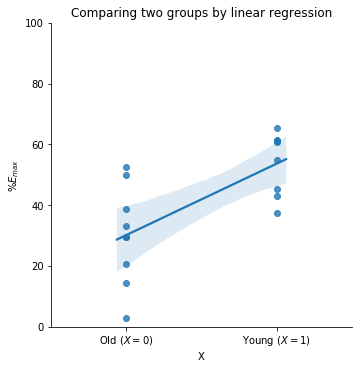

In [63]:
sns.lmplot('X', 'y', data=data)
plt.xticks([0,1], ['Old ($X=0$)', 'Young ($X=1$)'])
plt.xlim([-.5, 1.5])
plt.ylim([0, 100])
plt.ylabel("$\%E_{max}$")
plt.title("Comparing two groups by linear regression");

The slope of the best-fit regression line equals the difference between the means, because X values are one unit apart. The slope is 23.55 with 95% CI ranging from 9.338% to 37.75%, matching the results reported by the unpaired t test. Same for the P value.

In [64]:
import statsmodels.api as sm
X = data['X'].values
y = data['y'].values

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.418   
Dependent Variable: y                AIC:                139.1606
Date:               2018-10-15 15:34 BIC:                140.8271
No. Observations:   17               Log-Likelihood:     -67.580 
Df Model:           1                F-statistic:        12.47   
Df Residuals:       15               Prob (F-statistic): 0.00302 
R-squared:          0.454            Scale:              188.28  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      30.1667     4.5738   6.5955   0.0000   20.4178   39.9155
x1         23.5458     6.6674   3.5315   0.0030    9.3346   37.7571
-----------------------------------------------------------------
Omnibus:               0.260        Durbin-Watson:          2.044
Prob(Omnibus):   

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


## Goodness of fit and $R²$

The t test recast as a comparison of models:

Hypothesis | Scatter from | Sum of squares | Percentage of variation | $R²$
---|---|---|---|---
Null | Grand mean | 5172 | 100.0% |
Alternative | Group meand | 2824 | 54.6% |
Difference | Improvement | 2348 | 45.4% | 0.454

In [65]:
print(f"scatter from grand mean (H0): {compute_rss(y, np.mean(y)):6.0f}")

scatter from grand mean (H0):   5172


In [73]:
beta_0_2 = results.params[0]
beta_1_2 = results.params[1]

X = data['X'].values
y = data['y'].values

rss_2 = compute_rss(estimate_y(X, beta_0_2, beta_1_2), y)
print(f"scatter from group means: {rss_2:6.0f}")

scatter from group means:   2824


In [77]:
data.groupby('X').mean()

,y
X,
0,30.166667
1,53.712500


In [78]:
data['dist_grand'] = data['y'] - data['y'].mean()

In [84]:
data['dist_group'] = data.groupby('X')['y'].transform(lambda x: x - x.mean())

In [86]:
data.head()

,X,y,dist_grand,dist_group
0,0,20.8,-20.447059,-9.366667
1,0,2.8,-38.447059,-27.366667
2,0,50.0,8.752941,19.833333
3,0,33.3,-7.947059,3.133333
4,0,29.4,-11.847059,-0.766667


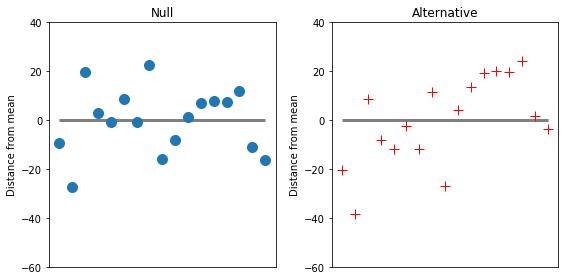

In [181]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
data['dist_group'].plot(marker='o', ms=10, linestyle='None')
plt.xticks([])
plt.ylim(-60, 40)
plt.ylabel('Distance from mean')
plt.title("Null")
plt.hlines(y=0, xmin=0, xmax=16, lw=3, colors='gray')

plt.subplot(1,2,2)
data['dist_grand'].plot(marker='+', ms=10, linestyle='None', c='r')
plt.xticks([])
plt.ylim(-60, 40)
plt.ylabel('Distance from mean')
plt.title("Alternative")
plt.hlines(y=0, xmin=0, xmax=16, lw=3, colors='gray')
plt.tight_layout();

In [143]:
data['dist_grand'].apply(lambda x: x**2).sum() # sum of squares in H0

5172.222352941178

In [152]:
data.groupby('X')['dist_group'].transform(lambda x: x**2).sum()
# sum of squares in the alternative hypothesis

2824.14875

## P value

The t test recast as a comparison of models:

Source of variation | Hypothesis | Scatter from | Sum of squares | DF | MS | F ratio
---|---|---|---|---|---|---
Between groups | Difference | Improvement | 2348 | 1 | 2348.0 | 12.47
Within groups | Alternative | Group mean | 2824 | 15 | 188.3 |
Total | Null |Grand mean | 5172 | 16 | \ |

1. 'Total'shows the fit of the null hypothesis, 17 data points $-$ one parameter (grand mean) leaves $DF=16$.
2. 'Within groups' shows the fit of the alternative model, two parameters are fitted (the mean of each group) leaving 15 df.
3. 'Regression' shows the difference.

Mean square (MS) also called *variances* is the RSS divided by DF

In [182]:
F = 2348/188.3
dfn, dfd = 1, 15
p_value= 1 - stats.f(dfn, dfd).cdf(F)
print(f"P values computed from the F ratio distribution: {p_value:5.4f}")

P values computed from the F ratio distribution: 0.0030


Viewed as linear regression, the slope is not zero. The goodness of fit of the two models is compared to see whether there is substantial evidence to reject the simpler (null hypothesis) model and accept the mode complicated alternative model.